# How to use

This package use PyPlot to visualize figure and ImageMagick to make gif animation. If you haven't installed these packages, you have to do before using this package.

In [1]:
#Pkg.add("PyPlot")
#Pkg.clone("https://github.com/tkMeitner/Percolation.jl")
using Percolation

# Nearest Neighbor

First we make N by N lattice. Then we open each site with probability p and occupied with probability 1-p.

In [7]:
# N: lattice size
# p: occupied probability
N = 10; p = 0.6
square = squarenn(N, p)

Percolation.squarenn(10,0.6,[2 0 … 0 0; 1 0 … 0 0; … ; 1 0 … 1 0; 1 1 … 1 1])

To visualize initial condition, type following code, but this is not necessary.
The white, blue and red sites correspond to open, water and block sites, respectively.
We assume the top of this lattice contacts with water and it permeates the lattice gradually.
If a nearest neighbor site of a water site is open, the open site becomes water site.

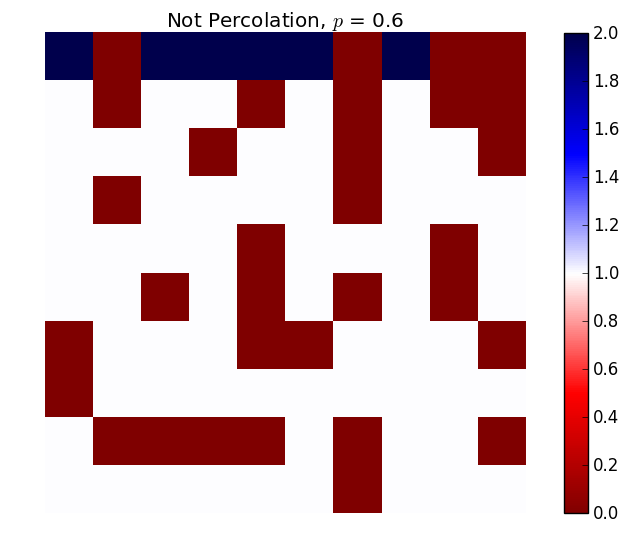

In [8]:
hit = 0; waterplot=true; color = "seismic_r"; colorbar=true
PercolationPlot(square, hit, waterplot, color, colorbar)
# If you want to use other colormap, see http://matplotlib.org/examples/color/colormaps_reference.html

We define "percolation" such that at least one path connected between top and bottom exists.
To check whether percolation occurs or not, use percolation function.
percolation function returns a value 0 or 1 and lattice configuration matrix.
The first value represents if percolation occurs or not. 0 is not percolating and 1 is percolating.

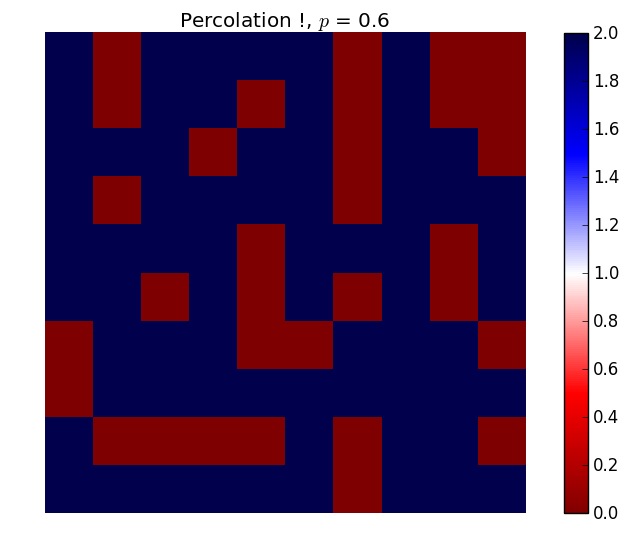

1

In [9]:
percolation(square, colorbar=true, color="seismic_r")
# If you want to use other colormap, see http://matplotlib.org/examples/color/colormaps_reference.html

If you want only final result as above picture, use squarennrec or squarennpos type instead of squarenn.
squarennrec and squarennpos are over one thousand times as fast as squarenn.

In [22]:
N = 100; p = 0.6
square = squarenn(N, p)
println("squarenn")
@time percolation(square, fig=false, colorbar=false, water=false); 
println()
println("squarennrec")
square = squarennrec(N, p)
@time percolation(square, fig=false, colorbar=false, water=false);

squarenn
  1.346505 seconds (734.77 k allocations: 27.995 MB, 0.24% gc time)

squarennrec
  0.000192 seconds (7 allocations: 1.172 KB)


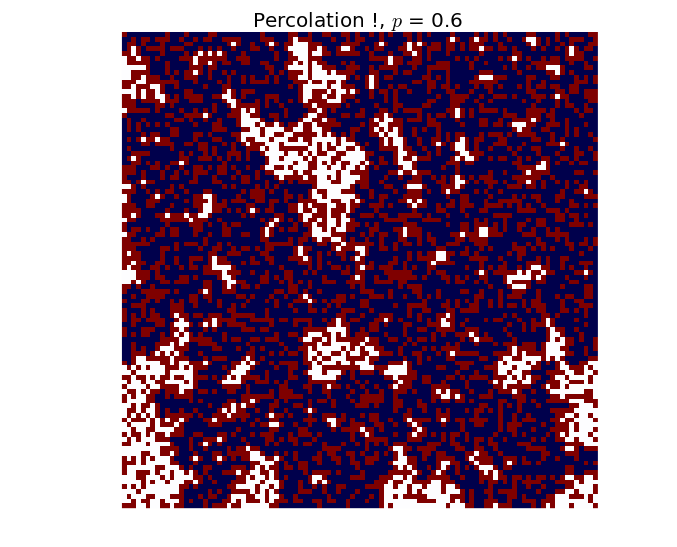

1

In [12]:
N = 100; p = 0.6
square = squarennrec(N, p)
percolation(square, color="seismic_r", colorbar=false)

# Next nearest neighbor

If you want to simulate not only nearest neighbor but next nearest neighbor, use squarennn type.

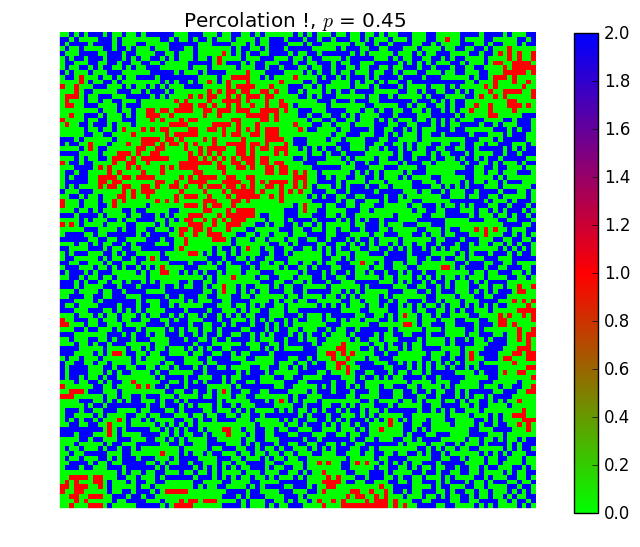

(1,
[0 0 … 2 2; 2 2 … 0 2; … ; 0 0 … 0 2; 0 0 … 2 0])

In [24]:
N = 100; p = 0.45
size = squarennn(N, p)
percolation(size)

## Triangular lattice

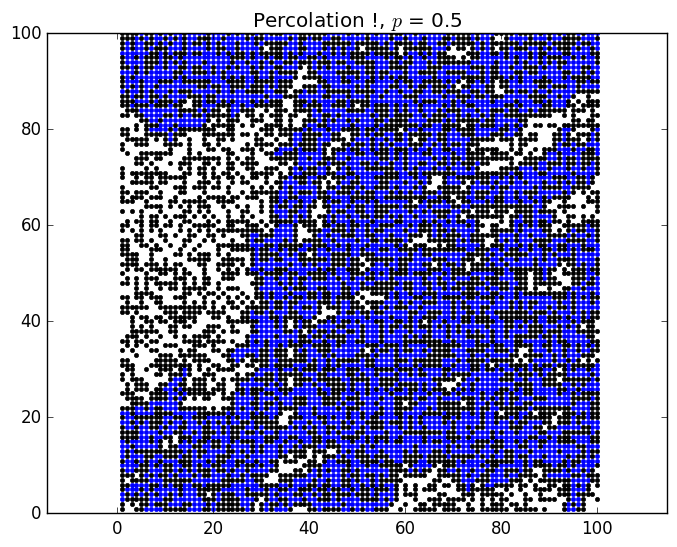

1

In [27]:
N = 100; p = 0.5;
tri = trinn(N, p);
percolation(tri)

## d dimensional simple lattice

In [31]:
N = 100; dim = 3; p = 0.4;
simple = simplennpos(N, dim, p);
@time percolation(simple)

 31.813958 seconds (62.01 M allocations: 1.943 GB, 1.49% gc time)


1

## Order Parameter

In [24]:
using PyPlot

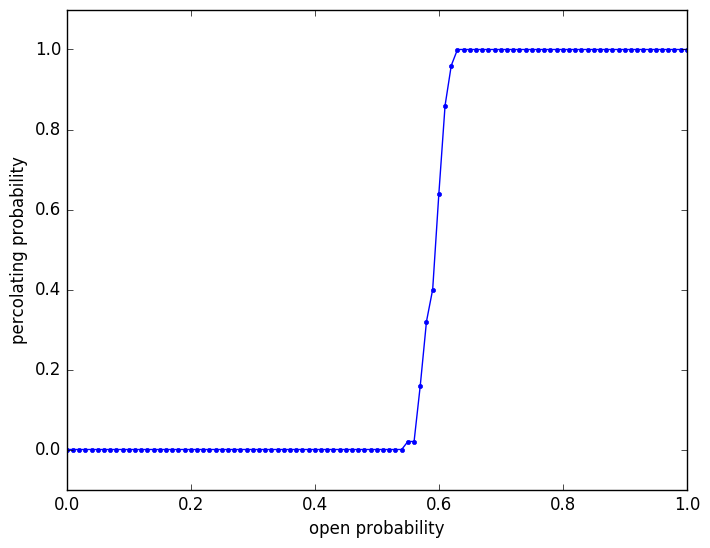

In [26]:
plist = collect(0:0.01:1)
hit = zeros(Int64, length(plist))
N = 100; trial = 50
for i in 1:length(plist)
    for itr in 1:trial
        square = squarennrec(N, plist[i])
        hit[i] += percolation(square, fig=false, colorbar=false, water=false)
    end
end
hit /= trial;
plot(plist, hit, ".-");
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);